Tasks:
- Data Import and Cleaning:
Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.

- Exploratory Data Analysis:
Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

- Statistical Analysis:
Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

- Time Series Analysis:
If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

- Advanced Visualization:
Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

- Matrix Operations in Real-World Context:
Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

- Integrating NumPy with Pandas and Matplotlib:
Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W6/D2/DAILY CHALLENGE/global_power_plant_database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [152]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [153]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [154]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [156]:
df = df[['country', 'name', 'capacity_mw', 'latitude', 'longitude', 
 'primary_fuel', 'commissioning_year', 'generation_gwh_2013', 
 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 
 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 
 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 
 'estimated_generation_gwh_2017', 'year_of_capacity_data', 
 'country_long', 'owner', 'geolocation_source']].copy()

In [157]:
df.isna().sum() # to check null values

country                              0
name                                 0
capacity_mw                          0
latitude                             0
longitude                            0
primary_fuel                         0
commissioning_year               17489
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
year_of_capacity_data            20049
country_long                         0
owner                            14068
geolocation_source                 419
dtype: int64

In [158]:
df.duplicated().sum()

np.int64(0)

Missing Data Notes:
- commissioning_year:               17489
- generation_gwh_2013:              28519
- generation_gwh_2014:              27710
- generation_gwh_2015:              26733
- generation_gwh_2016:              25792
- generation_gwh_2017:              25436
- generation_gwh_2018:              25299
- generation_gwh_2019:              25277
- estimated_generation_gwh_2013:    18816
- estimated_generation_gwh_2014:    18433
- estimated_generation_gwh_2015:    17886
- estimated_generation_gwh_2016:    17366
- estimated_generation_gwh_2017:     1798
- year_of_capacity_data:            20049
- owner:                            14068
- geolocation_source:                 419


In [159]:
with_year = df.query('commissioning_year.notnull()', engine='python')
with_year

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,...,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,year_of_capacity_data,country_long,owner,geolocation_source
9,ALB,Bistrica 1,27.0,39.9116,20.1047,Hydro,1965.0,NaN,NaN,NaN,...,NaN,105.17,75.26,79.50,105.45,88.45,NaN,Albania,NaN,GEODB
10,ALB,Fierza,500.0,42.2514,20.0431,Hydro,1978.0,NaN,NaN,NaN,...,NaN,1976.01,1276.61,1503.72,1795.15,1648.24,NaN,Albania,NaN,GEODB
11,ALB,Koman,600.0,42.1033,19.8224,Hydro,1985.0,NaN,NaN,NaN,...,NaN,2072.13,1618.73,1805.63,2434.84,1982.72,NaN,Albania,NaN,GEODB
12,ALB,Lanabregas,5.0,41.3428,19.8964,Hydro,1951.0,NaN,NaN,NaN,...,NaN,20.37,12.89,14.64,20.04,15.23,NaN,Albania,NaN,GEODB
13,ALB,Shkopet,24.0,41.6796,19.8305,Hydro,1963.0,NaN,NaN,NaN,...,NaN,93.52,69.86,77.51,96.20,83.57,NaN,Albania,NaN,GEODB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34917,YEM,Marib,400.0,15.5520,45.7717,Gas,2009.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1422.82,NaN,Yemen,Public Electricity Corporation,Industry About
34918,YEM,Ras Kanatib,150.0,14.9893,42.9113,Oil,1981.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,321.98,NaN,Yemen,Public Electricity Corporation,Industry About
34920,ZMB,Itezhi- Tezhi,120.0,-15.7688,26.0203,Hydro,1978.0,NaN,NaN,NaN,...,NaN,544.47,544.47,543.65,537.94,542.58,NaN,Zambia,ZESCO,GEODB
34922,ZMB,Kafue Gorge,990.0,-15.8089,28.4199,Hydro,1971.0,NaN,NaN,NaN,...,NaN,4042.48,4042.48,4167.26,4003.94,3909.20,NaN,Zambia,ZESCO,GEODB


In [160]:
df['year_of_capacity_data'].nunique()

11

In [161]:
df['name'].nunique()

34528

In [162]:
df['geolocation_source'].unique()

array(['GEODB', 'Wiki-Solar', 'KTH', 'Power Africa', 'WRI',
       'Ministerio de Energía y Minería',
       'Australian Renewable Energy Mapping Infrastructure', 'CARMA',
       'Open Power System Data',
       'Agência Nacional de Energia Elétrica (Brazil)', 'GCPT',
       'Natural Resources Canada', 'Energía Abierta',
       'UNFCCC CDM Registry', nan, 'Industry About',
       'Estonian Wind Energy Association',
       'Guatemala Energy Data Visualization Center at Universidad Rafael Landivar',
       'National Renewable Energy Laboratory',
       'North American Cooperation on Energy Information and Comisión Reguladora de Energía',
       'CDM', 'University of Dąbrowa Górnicza',
       'Energias Endogenas de Portugal', 'EnergyBase (RUS)',
       'UK Renewable Energy Planning Database', 'GEO',
       'U.S. Energy Information Administration',
       'La Administración Nacional de Usinas y Trasmisiones Eléctricas (Uruguay)',
       'Open Development Vietnam'], dtype=object)

In [163]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
# filling geolocation_source with mode because category data


In [164]:
df.drop(['year_of_capacity_data','owner'],axis=1,inplace=True)


In [165]:
df

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,...,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,country_long,geolocation_source
0,AFG,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,Afghanistan,GEODB
1,AFG,Kandahar DOG,10.0,31.6700,65.7950,Solar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,Afghanistan,Wiki-Solar
2,AFG,Kandahar JOL,10.0,31.6230,65.7920,Solar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,Afghanistan,Wiki-Solar
3,AFG,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,Afghanistan,GEODB
4,AFG,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,Afghanistan,GEODB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Ndola,50.0,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.79,Zambia,Power Africa
34932,ZMB,Nkana,20.0,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.51,Zambia,Power Africa
34933,ZMB,Victoria Falls,108.0,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,575.78,575.78,548.94,579.90,578.32,Zambia,Power Africa
34934,ZWE,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2785.10,Zimbabwe,GEODB


In [166]:
df.fillna(df.select_dtypes(include='number').median(), inplace=True)


In [167]:
df.isnull().sum() #to check null values

country                          0
name                             0
capacity_mw                      0
latitude                         0
longitude                        0
primary_fuel                     0
commissioning_year               0
generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
generation_gwh_2018              0
generation_gwh_2019              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
country_long                     0
geolocation_source               0
dtype: int64

# Explanation of Data Cleaning
Identified Missing Values:
Checked for NaN values in the dataset to determine which columns had incomplete data.

Handled Missing Values in Numeric Columns:
Used the median of numeric columns to fill in missing values (NaN). This approach ensures that the central tendency of the data is maintained without being skewed by extreme values.

Excluded Non-Numeric Columns from Median Fill:
Applied filtering to ensure that the median calculation and missing value imputation were only performed on numeric columns, avoiding errors caused by non-numeric data.

Checked and Processed Non-Numeric Columns:
Planned to handle non-numeric columns separately, either by replacing NaN values with placeholders (e.g., "Unknown") or the most frequent value for categorical columns.

# Exploratory Data Analysis:
- Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

In [168]:
df

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,...,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,country_long,geolocation_source
0,AFG,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,123.77,162.90,97.39,137.760,119.50,Afghanistan,GEODB
1,AFG,Kandahar DOG,10.0,31.6700,65.7950,Solar,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,18.43,17.48,18.25,17.700,18.29,Afghanistan,Wiki-Solar
2,AFG,Kandahar JOL,10.0,31.6230,65.7920,Solar,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,18.64,17.58,19.10,17.620,18.72,Afghanistan,Wiki-Solar
3,AFG,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,225.06,203.55,146.90,230.180,174.91,Afghanistan,GEODB
4,AFG,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,406.16,357.22,270.99,395.380,350.80,Afghanistan,GEODB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Ndola,50.0,-12.9667,28.6333,Oil,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,27.62,28.25,26.83,27.555,183.79,Zambia,Power Africa
34932,ZMB,Nkana,20.0,-12.8167,28.2000,Oil,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,27.62,28.25,26.83,27.555,73.51,Zambia,Power Africa
34933,ZMB,Victoria Falls,108.0,-17.9167,25.8500,Hydro,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,575.78,575.78,548.94,579.900,578.32,Zambia,Power Africa
34934,ZWE,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,2007.0,23.426,23.6085,26.142,...,17.8765,12.53,11.53,27.62,28.25,26.83,27.555,2785.10,Zimbabwe,GEODB


In [169]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803,2002.213173,127.988808,154.588104,199.008635,198.005249,192.985207,151.775157,125.547018,125.205717,129.424463,128.846972,132.232824,681.505825
std,489.636072,22.638603,78.405850,17.215166,957.739058,1046.708882,1266.608895,1264.941568,1268.250339,1061.662658,911.908039,816.018694,890.157657,891.256782,899.269378,2424.229996
min,1.000000,-77.847000,-179.977700,1896.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,2007.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.067500,8.960000
50%,16.745000,39.727750,-2.127100,2007.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2007.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,28.040000,195.640000
max,22500.000000,71.292000,179.388700,2020.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


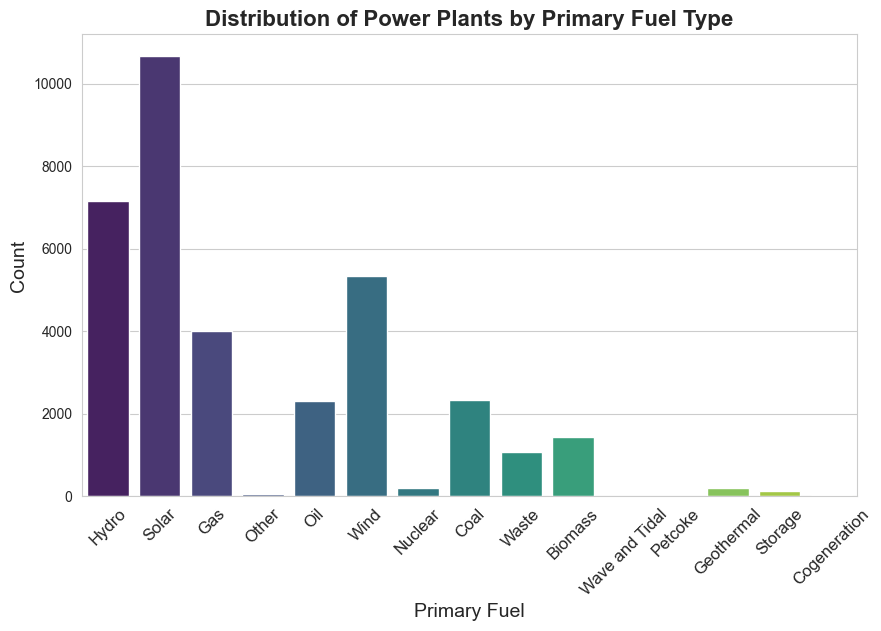

In [170]:
plt.figure(figsize=(10, 6)) 
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df, palette="viridis")


plt.title("Distribution of Power Plants by Primary Fuel Type", fontsize=16, fontweight='bold')
plt.xlabel("Primary Fuel", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.show()

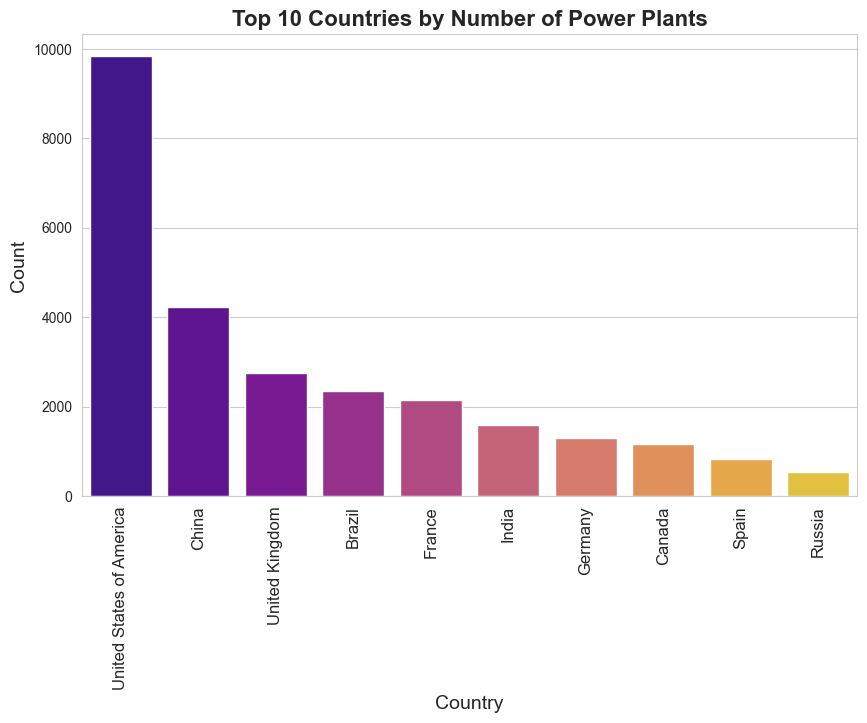

In [171]:
top_10_countries = df['country_long'].value_counts().head(10).index

# Filter the dataset to include only the top 10 countries
df_top_10 = df[df['country_long'].isin(top_10_countries)]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x="country_long", data=df_top_10, palette="plasma", order=top_10_countries)

# Add titles and labels
plt.title("Top 10 Countries by Number of Power Plants", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [172]:
import plotly.express as px

#geographical map of the world based on long and lat of powerplants in top 10 countries
top_10_countries = df['country_long'].value_counts().head(10).index
top_10_df = df[df['country_long'].isin(top_10_countries)]

fig = px.scatter_geo(top_10_df,
                     lat='latitude',
                     lon='longitude',
                     color='country_long',
                     hover_name='name',  # Hover text with power plant name
                     size_max=10,
                     title='Power Plants Location in Top 10 Countries')

fig.show()

Analysis:

Regarding fuel types, although oil and gas have been around longer it seems that Solar is the largest fuel source for powerplants across the data sets. Considering we filled null numeric values with the mean this could skew the data, however, considering solar power was first introduced in 1982 in California, and the mean year for commissioning powerplants is 2002, its safe to assume that solar has become a huge project for the energy industry.

As for the distribution of powerplants across the top 10 countries and data that has ben recorded since 1896, the US has the largest distribution of powerplants. Russia with the fewest. 

# Statistical Analysis
Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [173]:
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import pandas as pd

# HYPOTHESIS: The Solar fuel output does not provide as much energy as the oil output and has more plants that produce less energy.
# Null Hypothesis (H0): The average energy output of solar fuel plants is equal to or greater than the average energy output of oil plants.
# Alternative Hypothesis (H1): The average energy output of solar fuel plants is less than the average energy output of oil plants, and solar plants have a higher number of plants producing less energy.

solar_fuel = df[df['primary_fuel'] == 'Solar']
oil_fuel = df[df['primary_fuel'] == 'Oil']

print(f"Number of Solar Plants: {len(solar_fuel)}")
print(f"Number of Oil Plants: {len(oil_fuel)}")

solar_avg_output = solar_fuel['capacity_mw'].mean()
oil_avg_output = oil_fuel['capacity_mw'].mean()

print(f"Average Solar Output: {solar_avg_output} MW")
print(f"Average Oil Output: {oil_avg_output} MW")

t_statistic, p_value = ttest_ind(solar_fuel['capacity_mw'].dropna(), oil_fuel['capacity_mw'].dropna(), alternative='less')


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Number of Solar Plants: 10665
Number of Oil Plants: 2320
Average Solar Output: 17.657039239568682 MW
Average Oil Output: 112.87875414568967 MW
T-statistic: -24.45353683431888
P-value: 1.881227484941029e-129


Analysis:

The T-statistic of -24.45 and the extremely low p-value (1.88e-129) indicate that the average energy output of solar plants is significantly less than that of oil plants. Therefore, the null hypothesis (H0) is rejected, and the alternative hypothesis (H1) is supported.

# Time Series Analysis:
If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

In [174]:
df['commissioning_year'] = np.floor(df['commissioning_year']).astype(int)

USA Fuel Trends:
 primary_fuel        Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  \
commissioning_year                                                        
1896                      0     0             0    0           0      1   
1899                      0     0             0    0           0      1   
1900                      0     0             0    0           0      1   
1901                      0     0             0    0           0      1   
1902                      0     0             0    0           0      1   
...                     ...   ...           ...  ...         ...    ...   
2016                      3     0             1   28           0      9   
2017                      2     0             0   46           1      2   
2018                      3     0             0   51           2      2   
2019                      2     0             1   34           2      1   
2020                      1     0             0    6           0      0   

primar

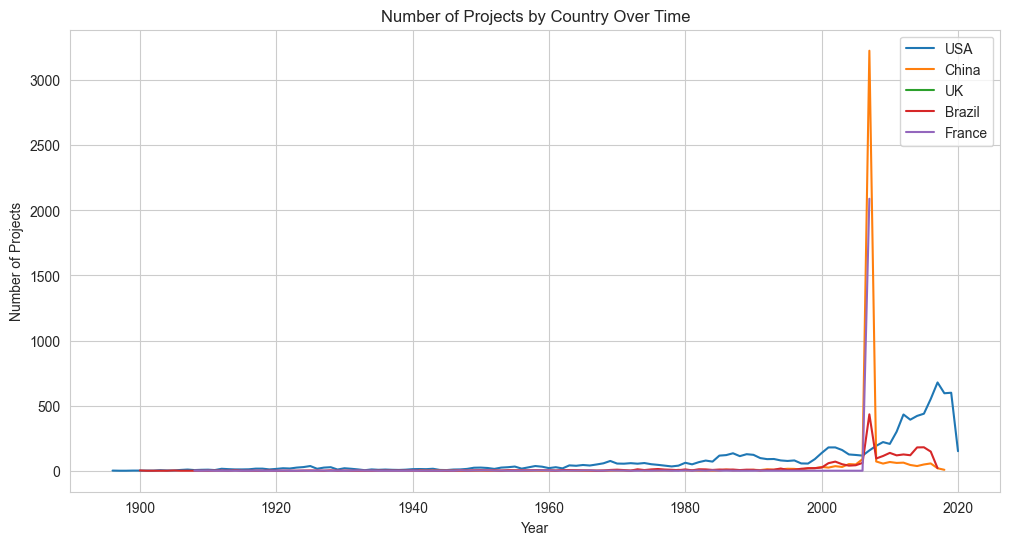

In [175]:
#use commission year, primary_fuel, and top 5 country_long to analyze trends by country over time. 
#np.range for each country is the first year of commission and the last year of commission.abs
#additional part of the range is the primary fuel type and its corresponding year. 
import numpy as np
import matplotlib.pyplot as plt

df = df[df['commissioning_year'].notna()]
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')


usa = df[df['country_long'] == 'United States of America']
china = df[df['country_long'] == 'China']
uk = df[df['country_long'] == 'United Kingdom']
brazil = df[df['country_long'] == 'Brazil']
france = df[df['country_long'] == 'France']

usa_year_range = np.arange(usa['commissioning_year'].min(), usa['commissioning_year'].max() + 1)
china_year_range = np.arange(china['commissioning_year'].min(), china['commissioning_year'].max() + 1)
uk_year_range = np.arange(uk['commissioning_year'].min(), uk['commissioning_year'].max() + 1)
brazil_year_range = np.arange(brazil['commissioning_year'].min(), brazil['commissioning_year'].max() + 1)
france_year_range = np.arange(france['commissioning_year'].min(), france['commissioning_year'].max() + 1)

usa_fuel_trend = usa[['commissioning_year','primary_fuel']].groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
china_fuel_trend = china[['commissioning_year','primary_fuel']].groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)    
uk_fuel_trend = uk[['commissioning_year','primary_fuel']].groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
brazil_fuel_trend = brazil[['commissioning_year','primary_fuel']].groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
france_fuel_trend = france[['commissioning_year','primary_fuel']].groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

print("USA Fuel Trends:\n", usa_fuel_trend)
print("China Fuel Trends:\n", china_fuel_trend)
print("UK Fuel Trends:\n", uk_fuel_trend)
print("Brazil Fuel Trends:\n", brazil_fuel_trend)
print("France Fuel Trends:\n", france_fuel_trend)

usa_fuel_trend = usa_fuel_trend.reindex(usa_year_range, fill_value=0)
china_fuel_trend = china_fuel_trend.reindex(china_year_range, fill_value=0)
uk_fuel_trend = uk_fuel_trend.reindex(uk_year_range, fill_value=0)
brazil_fuel_trend = brazil_fuel_trend.reindex(brazil_year_range, fill_value=0)
france_fuel_trend = france_fuel_trend.reindex(france_year_range, fill_value=0)

# Now plot
plt.figure(figsize=(12, 6))
plt.plot(usa_year_range, usa_fuel_trend.sum(axis=1), label='USA')
plt.plot(china_year_range, china_fuel_trend.sum(axis=1), label='China')
plt.plot(uk_year_range, uk_fuel_trend.sum(axis=1), label='UK')
plt.plot(brazil_year_range, brazil_fuel_trend.sum(axis=1), label='Brazil')
plt.plot(france_year_range, france_fuel_trend.sum(axis=1), label='France')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Number of Projects by Country Over Time')
plt.legend()
plt.show()

# Matrix Operations in Real-World Context:
Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

In [176]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['primary_fuel_encoded'] = encoder.fit_transform(df['primary_fuel'])

# Matrix with capacity, fuel type, latitude, and longitude
matrix = df[['capacity_mw', 'primary_fuel_encoded', 'latitude', 'longitude']].values

# Display the matrix
print("Matrix of attributes (Capacity, Fuel Type, Latitude, Longitude):\n", matrix)

# Perform some basic matrix operations
matrix_transpose = matrix.T  # Transpose the matrix
print("\nTransposed Matrix:\n", matrix_transpose)

# Compute the covariance matrix
cov_matrix = np.cov(matrix.T)  # Covariance between the attributes
print("\nCovariance Matrix:\n", cov_matrix)

Matrix of attributes (Capacity, Fuel Type, Latitude, Longitude):
 [[ 33.       5.      32.322   65.119 ]
 [ 10.      10.      31.67    65.795 ]
 [ 10.      10.      31.623   65.792 ]
 ...
 [108.       5.     -17.9167  25.85  ]
 [920.       1.     -18.3835  26.47  ]
 [750.       5.     -16.5222  28.7619]]

Transposed Matrix:
 [[ 33.      10.      10.     ... 108.     920.     750.    ]
 [  5.      10.      10.     ...   5.       1.       5.    ]
 [ 32.322   31.67    31.623  ... -17.9167 -18.3835 -16.5222]
 [ 65.119   65.795   65.792  ...  25.85    26.47    28.7619]]

Covariance Matrix:
 [[ 2.39743483e+05 -6.11727883e+02 -1.46512725e+02  5.81707732e+03]
 [-6.11727883e+02  1.78902035e+01  1.49091105e+01 -1.26704816e+01]
 [-1.46512725e+02  1.49091105e+01  5.12506327e+02 -1.21328995e+02]
 [ 5.81707732e+03 -1.26704816e+01 -1.21328995e+02  6.14747738e+03]]


In [177]:
# max_capacity_plant = df.loc[df['capacity_mw'].idxmax()]

top_10_plants = df.nlargest(50, 'capacity_mw')

# Create a map for the top 10 plants
fig = px.scatter_geo(top_10_plants,
                     lat='latitude',
                     lon='longitude',
                     hover_name='name',
                     color='country_long',
                     size='capacity_mw',  # Size based on capacity
                     title="Top 50 Power Plants by Capacity",
                     scope="world")

fig.show()


The matrix contains data on power plants' capacity, fuel type, latitude, and longitude. The transposed matrix swaps rows and columns for easier attribute comparison. The covariance matrix shows relationships between attributes, with diagonal values indicating variance and off-diagonal values showing how attributes like capacity and latitude relate to each other. This analysis helps understand dependencies between different plant characteristics.

The most significant plant, based on the covariance matrix, appears to be one with a high capacity (920 MW), which shows a strong relationship with longitude, indicating that plants with higher capacity tend to be located further east.